<a href="https://colab.research.google.com/github/Umaporn19/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Scaling

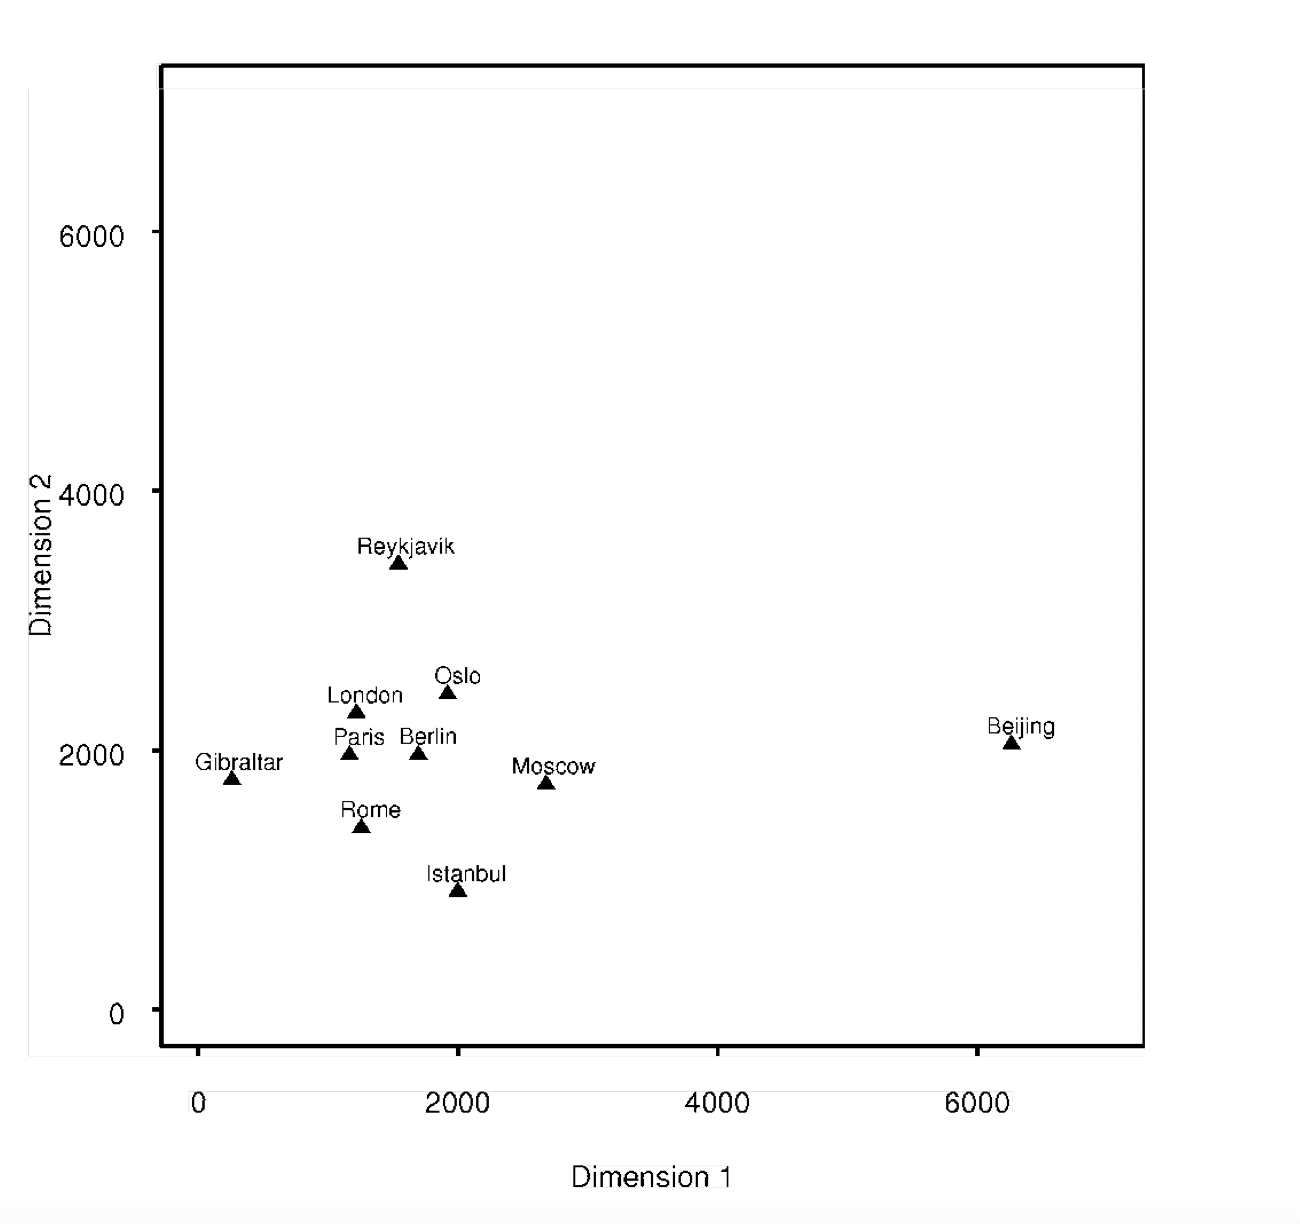

## Example on Iris dataset

In [ ]:
import pandas as pd #นำข้อมูลเข้าเหมือนเดิม

In [ ]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])  

In [ ]:
from matplotlib import pyplot as plt

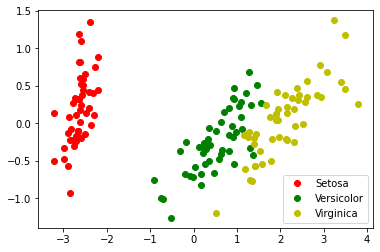

In [ ]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og' , label='Versicolor')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy' , label='Virginica')
plt.legend()

### MDS (Multidimensional Scaling)

### Distance (ระยะห่าง)


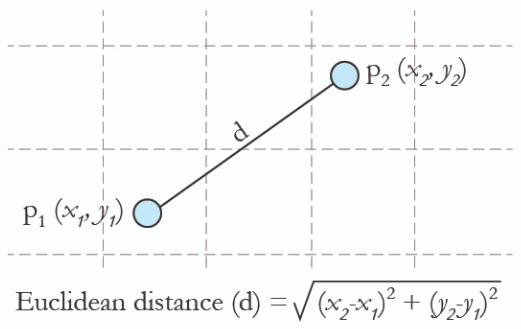

In [ ]:
X1 = example_df.iloc[0,:-1] . to_numpy() #เอาหมดทุกไดแมนชั่นเลยยกเว้นชื่อมัน
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [ ]:
X2 = example_df.iloc[1,:-1] . to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [ ]:
import numpy as np

In [ ]:
dist = np.linalg.norm(X1-X2) #พาคำนวณค่าตามสูตรในโปรแกรม
dist

0.5385164807134502

## Distance Matrix
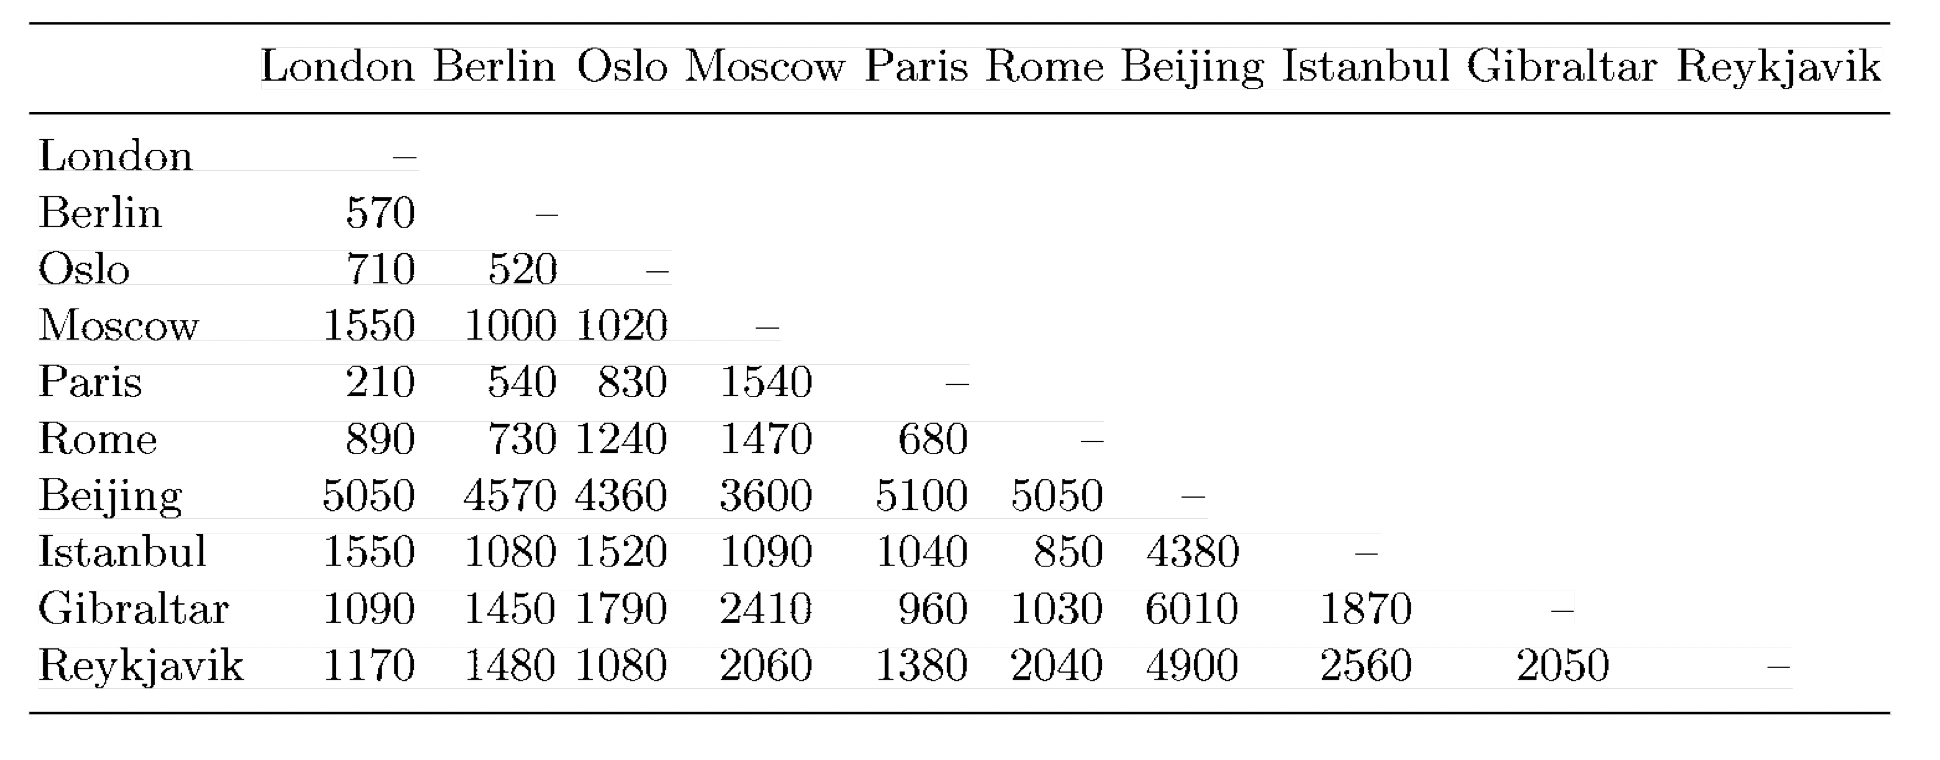

In [ ]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])  
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

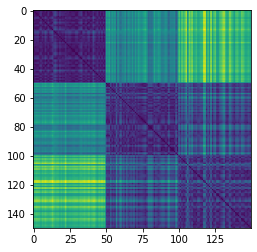

In [ ]:
plt.imshow(dis_matrix) #ยิ่งค่ามาก(ห่างมาก)สียิ่งสว่าง ถ้าค่าน้อยสียิ่งเข้ม

## ทำ MDS 

In [ ]:
from sklearn.manifold import MDS #การนำข้อมูลเข้าเหมือนเดิม

In [ ]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])  

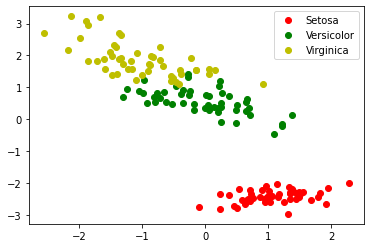

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa') #พล็อตพราฟดูข้อมูลระยะห่างแต่ละจุด ผลลัพธ์ตัวนี้บางคนจะไม่เหมือนกัน แกนสลับบ้าง ทิศทางสลับคนละทิศบ้าง 
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy' , label='Virginica')
plt.legend()

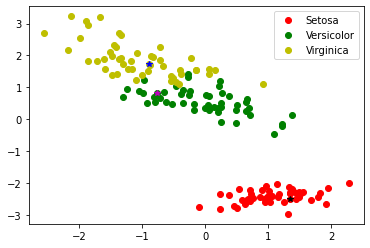

In [ ]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa') 
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy' , label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1], '*k') #กำหนดดาวเป็นสีม่วงของข้อมูลตัวที่ 6 
plt.plot(new_mds[56,0],new_mds[56,1], '*m') #กำหนดดาวเป็นสีน้ำเงินของข้อมูลตัวที่ 56 
plt.plot(new_mds[116,0],new_mds[116,1], '*b') #กำหนดดาวเป็นสีดำของข้อมูลตัวที่ 116 
plt.legend()
# พล๊อกดูว่าข้อมูลตัวไหนสีไหนใกล้กัน โดยการทำรูปดาวพล๊อกแทนจำนวนข้อมูลแต่ละสี โดยมีการกำนหนดสีที่ต่างกัน

### การใช้ Pre-computed Distance Matrix

In [ ]:
mds2 = MDS(n_components=2 , dissimilarity='precomputed') 

In [ ]:
new_mds2 = mds2.fit_transform(dis_matrix)  

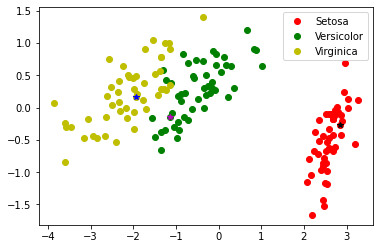

In [ ]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1],'or',label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1],'og' , label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1],'oy' , label='Virginica')
plt.plot(new_mds2[6,0],new_mds2[6,1], '*k')
plt.plot(new_mds2[56,0],new_mds2[56,1], '*m')
plt.plot(new_mds2[116,0],new_mds2[116,1], '*b')
plt.legend()

## Example 2

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #seaborn สำหรับวาดกราฟอย่างสวยงาม
import numpy as np

In [2]:
def make_hello(N=1000, rseed=42): #N = 1000 คือจำนวนจุดที่พล็อตลงกราฟ
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])] # รีเทินจุดให้เราไปใช้ต่อ

In [3]:
X = make_hello(1000) #  1000 คือจำนวนจุดที่พล็อตลงกราฟ

In [4]:
X.shape

(1000, 2)

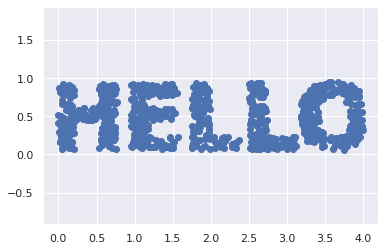

In [6]:
plt.scatter(X[:,0],X[:,1]) # ลองไม่ใส่สี
plt.axis('equal'); #ทำให้สเกลของแต่ละแกนเท่ากัน ทำให้สวยงามขึ้น

In [8]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [10]:
colorize['c'].shape # C คือค่าตัวเลข 1000 ตัว

(1000,)

In [12]:
colorize['cmap']

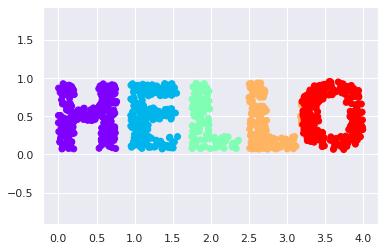

In [15]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal'); #แบบใส่สีแล้ว

In [16]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R) #เป็นกังก์ชันที่หมูน data กี่องศา 

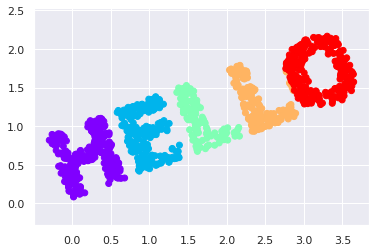

In [17]:
X2 = rotate(X, 20)  #หมุนไป 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize) #พล็อตจุดที่หมุนไปแล้วใส่สีตามเดิม
plt.axis('equal'); # ; ใส่เพื่อไม่ให้มันโชว์อะไรให้มันสวยงาม

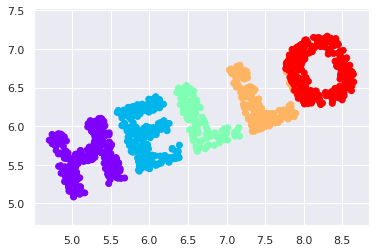

In [18]:
X2 = rotate(X, 20) + 5 # +5 ต่างจากรูปบนคือ สเกลเหมือนเดิมแต่ระยะห่างต่างกัน เลื่อนไปแนวแกน x , y อย่างละ 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

### MDS 

In [19]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X) 
D.shape

(1000, 1000)

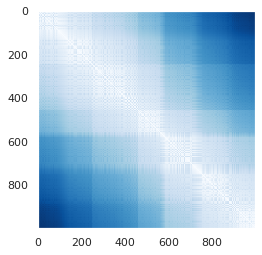

In [22]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest') #ดูว่าจุดไหนใกล้จุดไหน ระยะห่างของแต่ละจุด  
#plt.colorbar();  เพิ่มสเกลบอกความเข้มสี
# จุดที่ 1 และจุดที่ 1000 ระยะห่างกันมากที่สุดสีเลยเข้มที่สุด แถวบนสุด
# จุดที่ 1 และจุดที่ 1000 ระยะห่างกันมากที่สุดสีเลยเข้มที่สุด แถวล่างสุด เมทริกซ์สมมาตรกัน ค่าเดียวกัน 
# ถ้าห่างกันนิดเดียวสีจะสว่าง ๆ 

In [ ]:
D2 = pairwise_distances(X2) #สร้างระยะห่างของตัวที่หมุนแล้ว

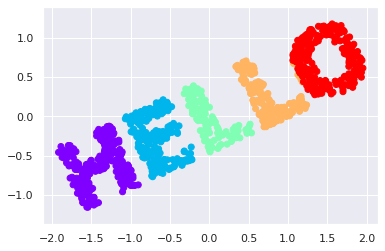

In [23]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) 
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

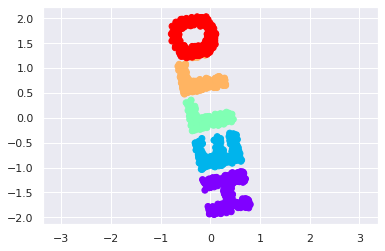

In [24]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D) 
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [ ]:
# ถ้าไม่มี random_state เอาไว้ดูว่า ผลลัพธ์ออกมาจะไม่เหมือนกันเวลาหมุน อยู่คนละทิศกัน แต่ยังคงมีระยะห่างเท่าเดิม
# แต่ถ้ามี random_state จะฟิกได้ว่าตัวแรกจำนวนจุดเป็นตัวไหน จะได้จุดเหมือนกันหมด

In [ ]:
# MDS มันกว่าชาวบ้านเขา คนเลยไม่ค่อยอยากใช้เท่าไหร่

* zorder in plt.imshop
* np.allclose 

### Quiz 4 ทดลองทำ PCA กับข้อมูล ``` X2``` แล้ว Plotgraph
### และดูผลว่าการกระจายของข้อมูลมันเปลี่ยนไปหรือไม่อย่างไร 
ส่งก่อน 14.15 commit ว่า Quiz 4 



In [36]:
import numpy as np #นำข้อมูลเข้าเหมือนเดิม

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)

In [42]:
New_pca = pca.fit_transform(X)

In [43]:
New_pca 

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

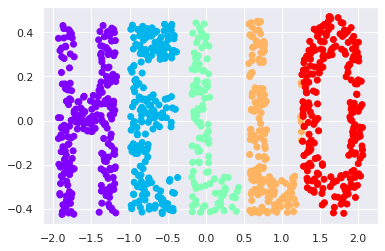

In [44]:
plt.scatter(New_pca[:,0],new_pca2[:,1], **colorize)

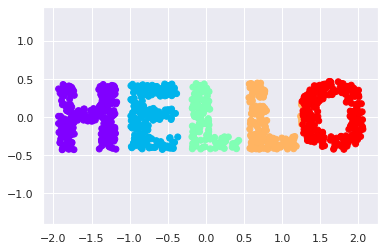

In [45]:
plt.scatter(New_pca[:, 0], new_pca2[:, 1], **colorize)
plt.axis('equal');

In [ ]:
# ผลลัพธ์ที่ออกมาลักษณะเหมือนเดิม ข้อมูลจึงไม่เปลี่ยนแปลงไป 

## เฉลยตามแบบอาจารย์

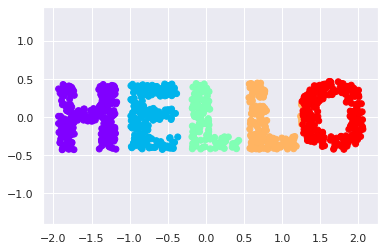

In [46]:
model = PCA(n_components=2)
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal'); 

In [ ]:
# ลักษณะ PCA ที่มันไม่เบี้ยว ๆ เหมือนรูปข้างบน เพราะว่า PCA มันหาไอเกน ที่แกนกระจายมากที่สุด ความแปรปวนมากที่สุด ถึงจะหมุนไปยังไง PCA ก็จะหมุนกลับมาแกนมาเหมือนเดิม
# จะกลับส่วนที่มีการกระขายมากที่สุดกลับมาแกน X เหมือนเดิม 